
# Annotations

You can annotate your renderings using Vapor's build in annotations as well as MatPlotLib


In [1]:
import example_utils
from vapor import session, renderer, dataset, camera
from vapor.utils import histogram

ses = session.Session()
data = example_utils.OpenExampleDataset(ses)

ren = data.NewRenderer(renderer.TwoDDataRenderer)
ren.SetVariableName(data.GetDataVarNames(2)[1])
ses.GetCamera().ViewAll()

Vapor 3.10.0
Python 3.9.19 (/opt/anaconda3/envs/vapor)
OpenGL 4.1 Metal - 89.3



## Vapor Colorbars


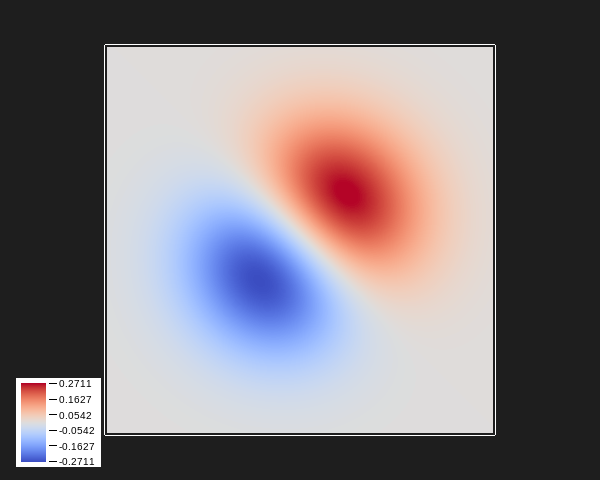

In [2]:
# Show the basic colorbar annotation for a renderer
colorbar = ren.GetColorbarAnnotation()
colorbar.SetEnabled(True)
ses.Show()

UNSUPPORTED (log once): POSSIBLE ISSUE: unit 0 GLD_TEXTURE_INDEX_2D is unloadable and bound to sampler type (Float) - using zero texture because texture unloadable


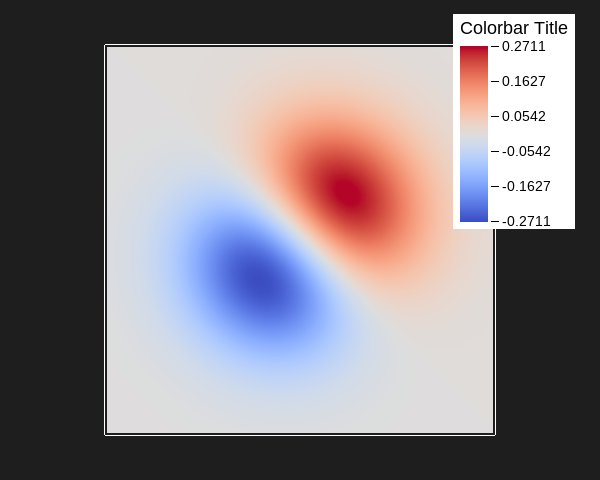

In [3]:
# Customized colorbar annotation
colorbar.SetSize((0.2, 0.25))
colorbar.SetTitle("Colorbar Title")
colorbar.SetCornerPosition((0.95, 0.95))
ses.Show()


## MatPlotLib Colorbars

You can customize the histograms as you would MatPlotLib's `pylab.colorbar`


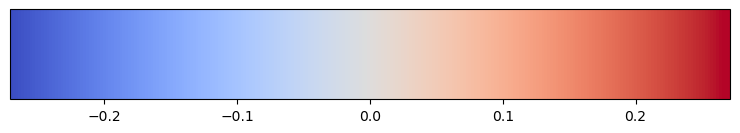

In [4]:
tf = ren.GetPrimaryTransferFunction()
tf.ShowMatPlotLibColorbar()

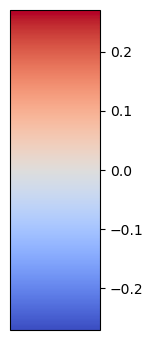

In [5]:
tf.ShowMatPlotLibColorbar(orientation="vertical", figsize=(1.5,4))

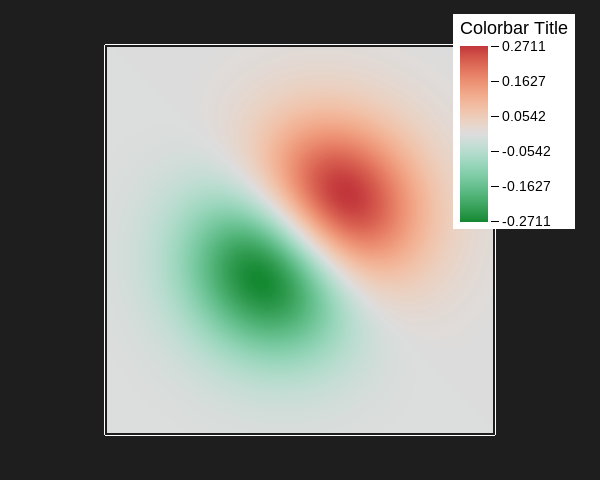

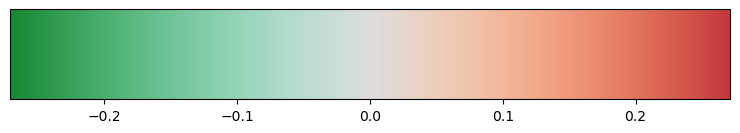

In [6]:
# The MatPlotLib Colorbars are automatically synced to Vapor's transfer functions
tf.LoadBuiltinColormap(tf.ListBuiltinColormaps()[7])
ses.Show()
tf.ShowMatPlotLibColorbar()

In [7]:
colorbar.SetEnabled(False)


## MatPlotLib Histograms


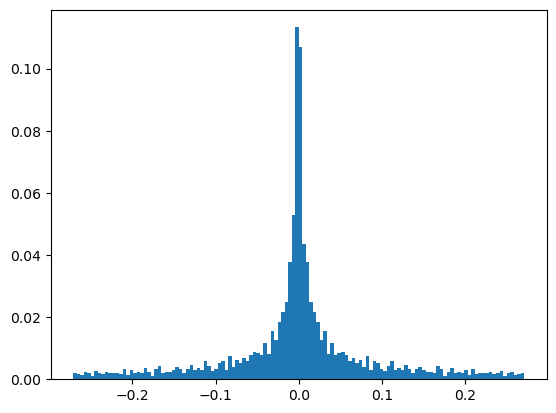

In [8]:
histogram.ShowMatPlotLibHistogram(ses, ren)

---
You can customize the histograms as you would `matplotlib.pyplot.hist`


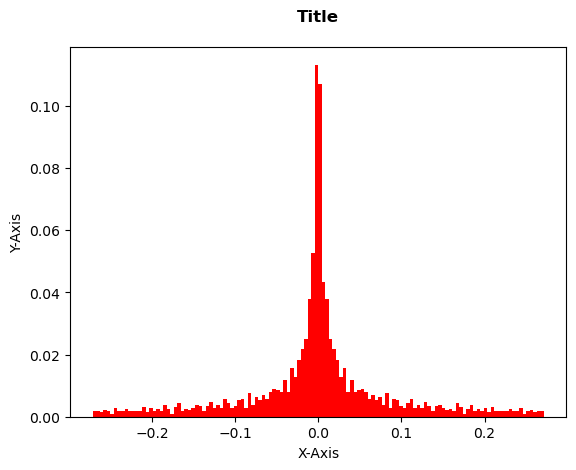

In [9]:
plt = histogram.GetMatPlotLibHistogram(ses, ren, color ="red")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Title\n", fontweight="bold")
plt.show()


## Axis Annotations


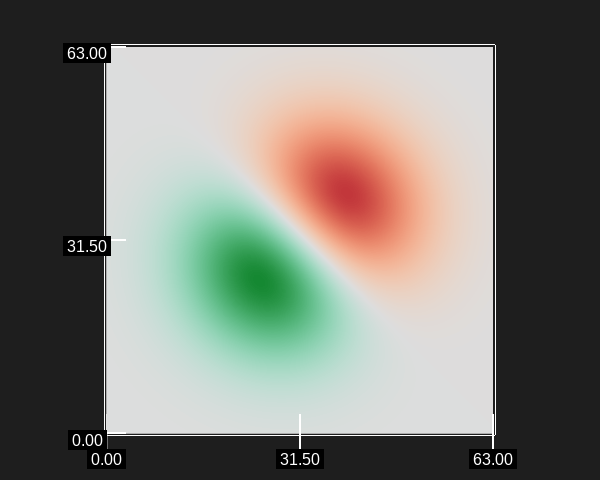

In [10]:
axis = ses.GetAxisAnnotations()
axis.SetAxisAnnotationEnabled(True)
ses.Show()

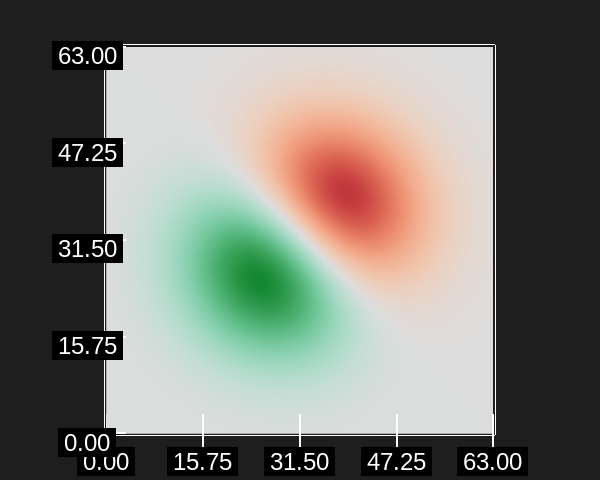

In [11]:
axis.SetNumTics((5,5))
axis.SetAxisFontSize(24)
ses.Show()

# This example dataset is not geo-referenced
# axis.SetLatLonAxesEnabled(True)

In [12]:
axis.SetAxisAnnotationEnabled(False)


## Scene Annotations

Scene annotations are other annotations and rendering options that apply to the entire rendering such as background color.


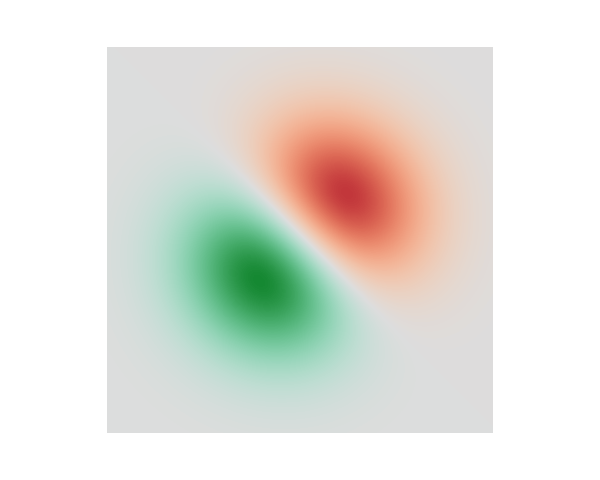

In [13]:
scene = ses.GetSceneAnnotations()
scene.SetBackgroundColor((1,1,1))
scene.SetUseDomainFrame(False)
ses.Show()

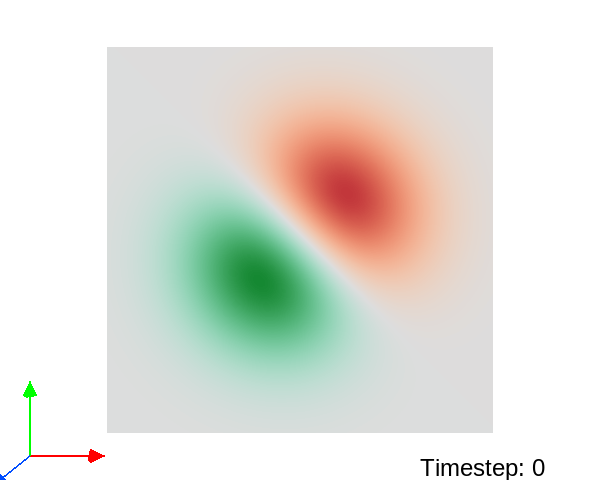

In [14]:
scene.SetAxisArrowEnabled(True)
scene.SetAxisArrowSize(0.4)

scene.SetTimeType(scene.TimeAnnotationType.Timestep)
scene.SetTimeColor((0,0,0))
scene.SetTimeLLX(0.7)

ses.Show()